# PREPARA√á√ÉO DOS DADOS

1 - Extra√ß√£o do Arquivo Tratado

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Leitura do arquivo tratado
dados = pd.read_csv("dados_tratados.csv")

# Remover linhas com Cancelou = nulo
dados = dados.dropna(subset=["Cancelou"])

print("Formato ap√≥s carregamento:", dados.shape)
dados.head()


Formato ap√≥s carregamento: (7043, 21)


ID_Cliente Cancelou  Genero  Idoso Possui_Conjuge Possui_Dependentes  \
0  0002-ORFBO       No  Female      0            Yes                Yes   
1  0003-MKNFE       No    Male      0             No                 No   
2  0004-TLHLJ      Yes    Male      0             No                 No   
3  0011-IGKFF      Yes    Male      1            Yes                 No   
4  0013-EXCHZ      Yes  Female      1            Yes                 No   

   Meses_Permanencia Servico_Telefone Multiplas_Linhas Tipo_Internet  ...  \
0                  9              Yes               No           DSL  ...   
1                  9              Yes              Yes           DSL  ...   
2                  4              Yes               No   Fiber optic  ...   
3                 13              Yes               No   Fiber optic  ...   
4                  3              Yes               No   Fiber optic  ...   

  Backup_Online Protecao_Dispositivo Suporte_Tecnico Streaming_TV  \
0           Yes                   No             Yes          Yes   
1            No                   No              No           No   
2            No                  Yes              No           No   
3           Yes                  Yes              No          Yes   
4            No                   No             Yes          Yes   

  Streaming_Filmes   Tipo_Contrato Fatura_Digital  Metodo_Pagamento  \
0               No        One year            Yes      Mailed check   
1              Yes  Month-to-month             No      Mailed check   
2               No  Month-to-month            Yes  Electronic check   
3              Yes  Month-to-month            Yes  Electronic check   
4               No  Month-to-month            Yes      Mailed check   

  Cobranca_Mensal  Cobranca_Total  
0            65.6          593.30  
1            59.9          542.40  
2            73.9          280.85  
3            98.0         1237.85  
4            83.9          267.40  

[5 rows x 21 columns]

2 - Remo√ß√£o de Colunas Irrelevantes

In [30]:
# Exemplo: se houvesse uma coluna ID ou nome do cliente, removemos
colunas_irrelevantes = ["ID_Cliente"]

dados = dados.drop(columns=colunas_irrelevantes, errors="ignore")

print("Formato ap√≥s remo√ß√£o de colunas irrelevantes:", dados.shape)


Formato ap√≥s remo√ß√£o de colunas irrelevantes: (7043, 20)


3 - Encoding (Transforma√ß√£o de vari√°veis categ√≥ricas)

In [31]:
from sklearn.preprocessing import LabelEncoder

# Separar target
y = dados["Cancelou"]
X = dados.drop(columns=["Cancelou"])

# Encoding do target (Sim/N√£o ‚Üí 1/0)
y = LabelEncoder().fit_transform(y)

# Encoding das vari√°veis categ√≥ricas
X_encoded = pd.get_dummies(X, drop_first=True)

print("Formato ap√≥s encoding:", X_encoded.shape)


Formato ap√≥s encoding: (7043, 30)


4 - Verifica√ß√£o da Propor√ß√£o de Evas√£o

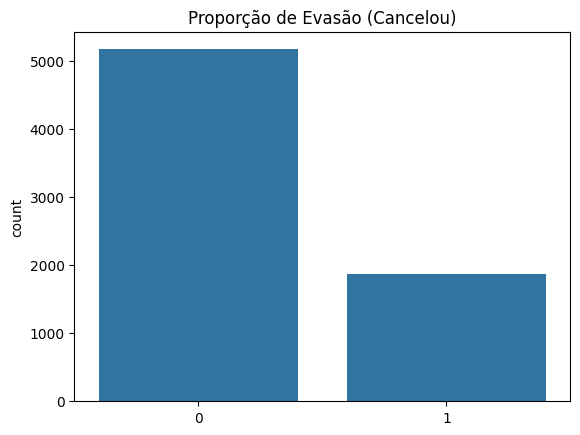

Distribui√ß√£o:
0 ‚Üí 5174 (73.46%)
1 ‚Üí 1869 (26.54%)


In [32]:
# Distribui√ß√£o do target
sns.countplot(x=y)
plt.title("Propor√ß√£o de Evas√£o (Cancelou)")
plt.show()

unique, counts = np.unique(y, return_counts=True)
print("Distribui√ß√£o:")
for u, c in zip(unique, counts):
    print(f"{u} ‚Üí {c} ({c/len(y):.2%})")


5 - Balanceamento de Classes (opcional)

In [33]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X_encoded, y)

print("Formato ap√≥s balanceamento:", X_bal.shape)
print("Distribui√ß√£o balanceada:")
unique, counts = np.unique(y_bal, return_counts=True)
for u, c in zip(unique, counts):
    print(f"{u} ‚Üí {c}")


Formato ap√≥s balanceamento: (10348, 30)
Distribui√ß√£o balanceada:
0 ‚Üí 5174
1 ‚Üí 5174


6 - Normaliza√ß√£o ou Padroniza√ß√£o

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_bal)

print("Formato ap√≥s padroniza√ß√£o:", X_scaled.shape)


Formato ap√≥s padroniza√ß√£o: (10348, 30)


# CORRELA√á√ÉO E SELE√á√ÉO DE VARI√ÅVEIS

7 - An√°lise de Correla√ß√£o

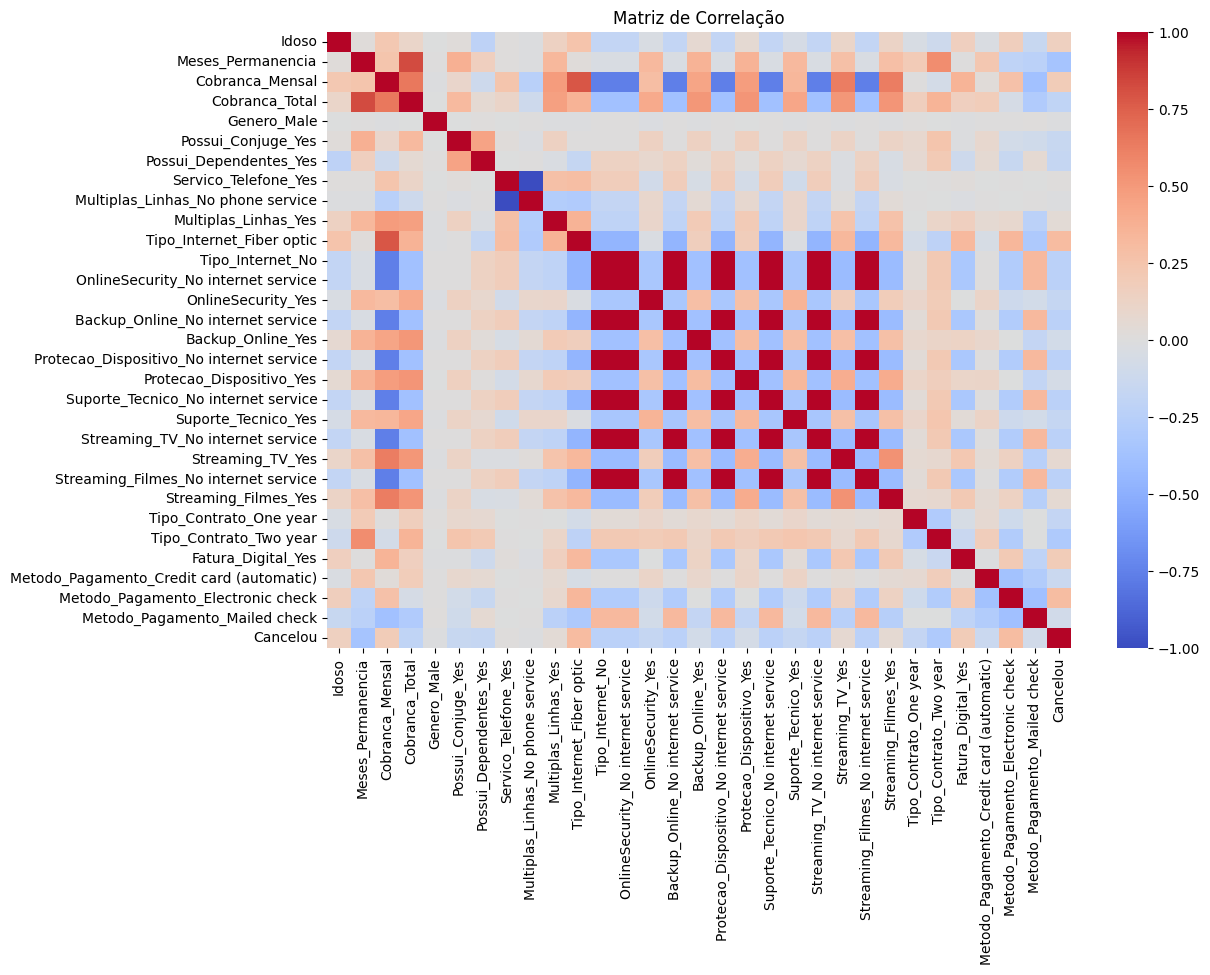

Correla√ß√£o com Cancelou:
Cancelou                             1.000000
Tipo_Internet_Fiber optic            0.308020
Metodo_Pagamento_Electronic check    0.301919
Cobranca_Mensal                      0.193356
Fatura_Digital_Yes                   0.191825
Idoso                                0.150889
Streaming_TV_Yes                     0.063228
Streaming_Filmes_Yes                 0.061382
Multiplas_Linhas_Yes                 0.040102
Servico_Telefone_Yes                 0.011942
Genero_Male                         -0.008612
Multiplas_Linhas_No phone service   -0.011942
Protecao_Dispositivo_Yes            -0.066160
Backup_Online_Yes                   -0.082255
Metodo_Pagamento_Mailed check       -0.091683
Name: Cancelou, dtype: float64


In [35]:
# Converter X_encoded para DataFrame (se ainda estiver como numpy)
if not isinstance(X_encoded, pd.DataFrame):
    X_encoded = pd.DataFrame(X_encoded)

# Adicionar o target para an√°lise conjunta
dados_corr = X_encoded.copy()
dados_corr["Cancelou"] = y

# Matriz de correla√ß√£o
corr_matrix = dados_corr.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Matriz de Correla√ß√£o")
plt.show()

# Mostrar as maiores correla√ß√µes com a vari√°vel alvo "Cancelou"
correlacoes_com_target = corr_matrix["Cancelou"].sort_values(ascending=False)
print("Correla√ß√£o com Cancelou:")
print(correlacoes_com_target.head(15))


8 - An√°lises Direcionadas

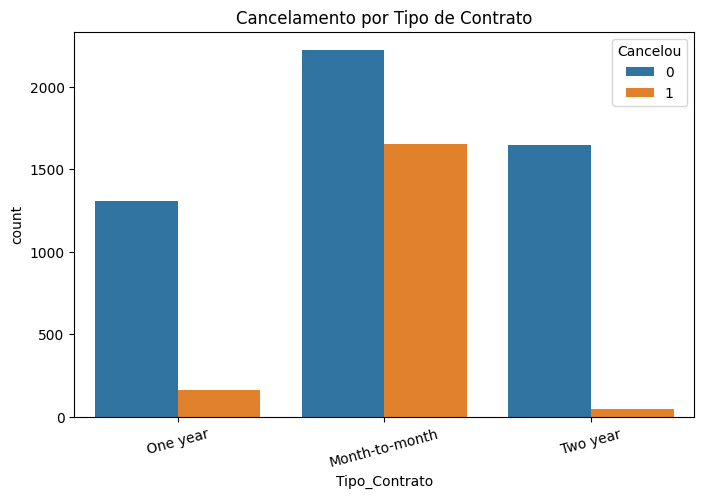

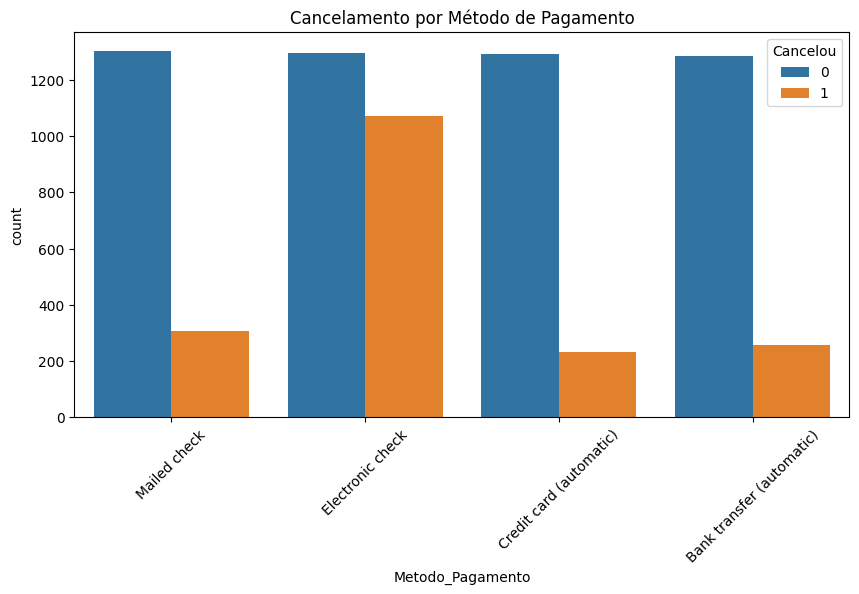

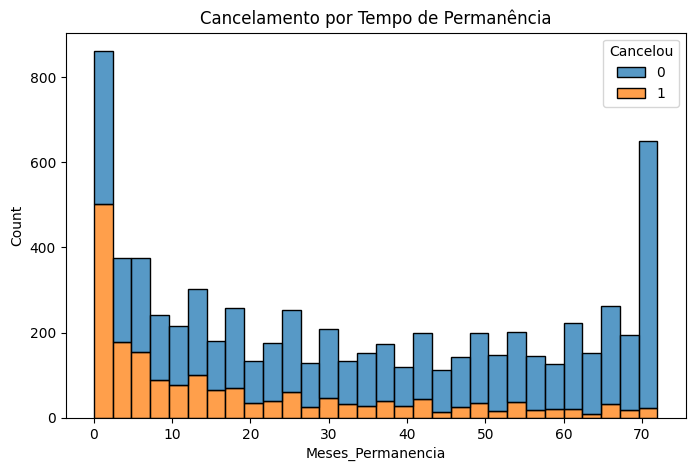

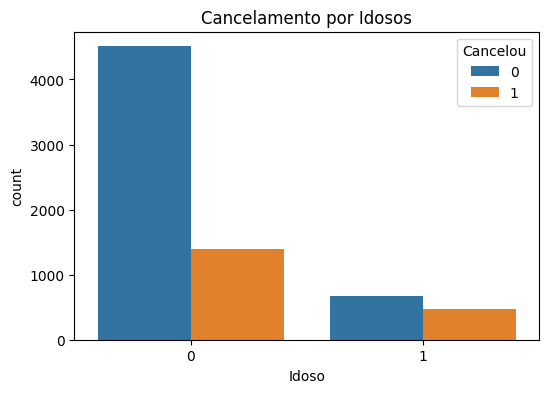

In [36]:
# Juntar X original (sem encoding) com y para an√°lises categ√≥ricas
df_analise = X.copy()
df_analise["Cancelou"] = y

# Cancelamento por tipo de contrato
plt.figure(figsize=(8,5))
sns.countplot(data=df_analise, x="Tipo_Contrato", hue="Cancelou")
plt.title("Cancelamento por Tipo de Contrato")
plt.xticks(rotation=15)
plt.show()

# Cancelamento por m√©todo de pagamento
plt.figure(figsize=(10,5))
sns.countplot(data=df_analise, x="Metodo_Pagamento", hue="Cancelou")
plt.title("Cancelamento por M√©todo de Pagamento")
plt.xticks(rotation=45)
plt.show()

# Cancelamento por faixa de perman√™ncia
plt.figure(figsize=(8,5))
sns.histplot(data=df_analise, x="Meses_Permanencia", hue="Cancelou", bins=30, kde=False, multiple="stack")
plt.title("Cancelamento por Tempo de Perman√™ncia")
plt.show()

# Cancelamento por idosos
plt.figure(figsize=(6,4))
sns.countplot(data=df_analise, x="Idoso", hue="Cancelou")
plt.title("Cancelamento por Idosos")
plt.show()


# MODELAGEM PREDITIVA

9 - Separa√ß√£o de Dados

In [40]:
from sklearn.model_selection import train_test_split

# Usando os dados j√° balanceados e padronizados (X_scaled e y_bal)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_bal, test_size=0.3, random_state=42, stratify=y_bal
)

print("Treino:", X_train.shape, "Teste:", X_test.shape)


Treino: (7243, 30) Teste: (3105, 30)


10 - Cria√ß√£o de Modelos

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Modelos
modelos = {
    "Regress√£o Log√≠stica": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Treinar modelos
for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    print(f"{nome} treinado com sucesso!")


Regress√£o Log√≠stica treinado com sucesso!
Random Forest treinado com sucesso!
Gradient Boosting treinado com sucesso!


11 - Avalia√ß√£o dos Modelos

üîπ Avalia√ß√£o do Modelo: Regress√£o Log√≠stica
              precision    recall  f1-score   support

           0      0.835     0.818     0.826      1553
           1      0.821     0.838     0.830      1552

    accuracy                          0.828      3105
   macro avg      0.828     0.828     0.828      3105
weighted avg      0.828     0.828     0.828      3105

AUC: 0.920


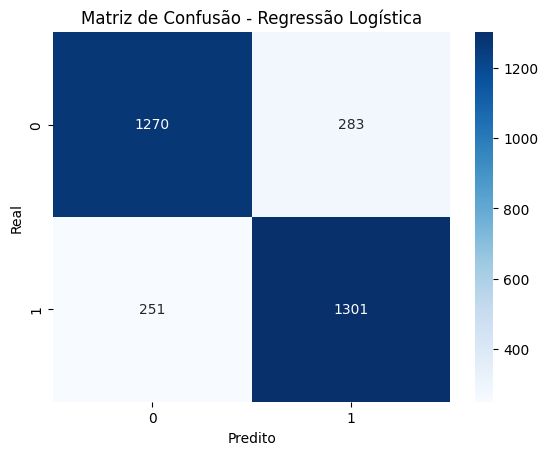

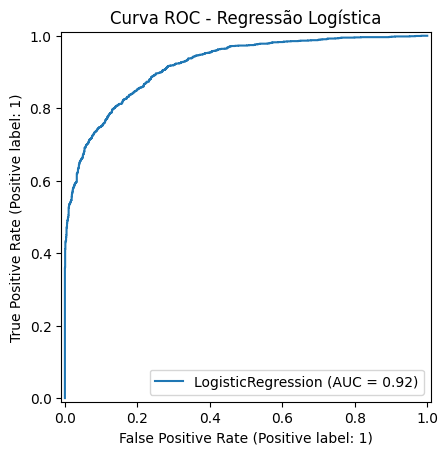

üîπ Avalia√ß√£o do Modelo: Random Forest
              precision    recall  f1-score   support

           0      0.849     0.831     0.840      1553
           1      0.834     0.852     0.843      1552

    accuracy                          0.841      3105
   macro avg      0.841     0.841     0.841      3105
weighted avg      0.841     0.841     0.841      3105

AUC: 0.928


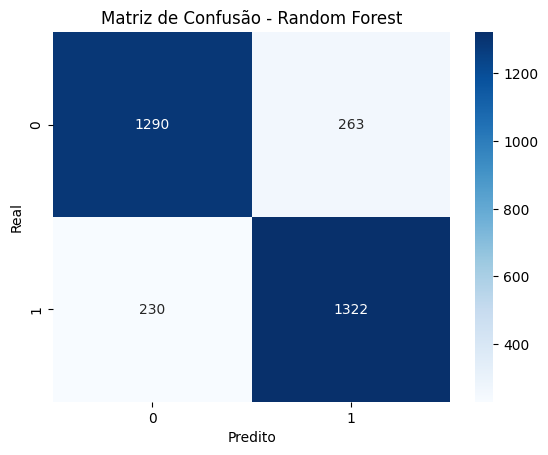

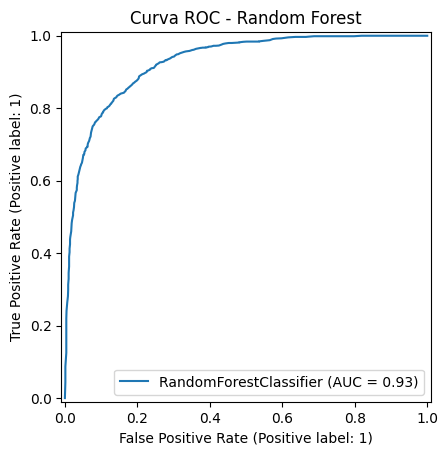

üîπ Avalia√ß√£o do Modelo: Gradient Boosting
              precision    recall  f1-score   support

           0      0.853     0.802     0.826      1553
           1      0.813     0.861     0.836      1552

    accuracy                          0.832      3105
   macro avg      0.833     0.832     0.831      3105
weighted avg      0.833     0.832     0.831      3105

AUC: 0.918


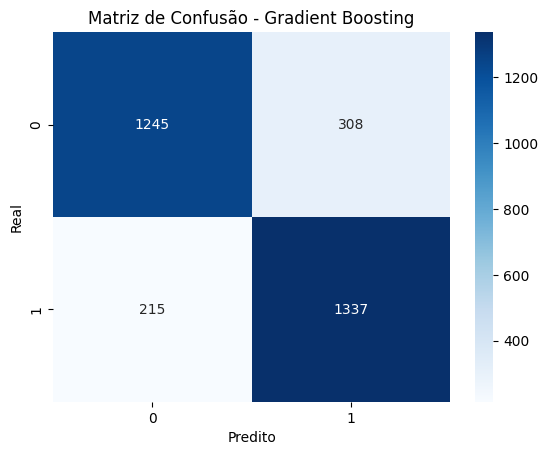

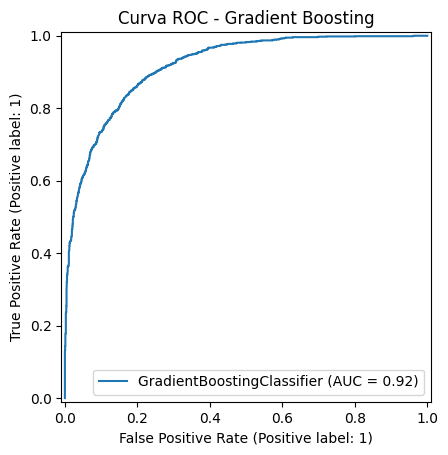

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

for nome, modelo in modelos.items():
    print("="*50)
    print(f"üîπ Avalia√ß√£o do Modelo: {nome}")

    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:,1]

    # Relat√≥rio
    print(classification_report(y_test, y_pred, digits=3))

    # AUC
    auc = roc_auc_score(y_test, y_proba)
    print(f"AUC: {auc:.3f}")

    # Matriz de confus√£o
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confus√£o - {nome}")
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.show()

    # Curva ROC
    RocCurveDisplay.from_estimator(modelo, X_test, y_test)
    plt.title(f"Curva ROC - {nome}")
    plt.show()


# INTERPRETA√á√ÉO E CONCLUS√ïES

12 - An√°lise de Import√¢ncia das Vari√°veis

importance_rf  importance_gb  \
Meses_Permanencia                              0.160679       0.222227   
Tipo_Internet_Fiber optic                      0.046441       0.098430   
Cobranca_Mensal                                0.129964       0.037324   
Metodo_Pagamento_Electronic check              0.102975       0.357657   
Cobranca_Total                                 0.167343       0.041776   
Streaming_TV_Yes                               0.018604       0.014881   
Multiplas_Linhas_Yes                           0.022835       0.018163   
Streaming_Filmes_Yes                           0.017352       0.009131   
Fatura_Digital_Yes                             0.038931       0.048962   
Servico_Telefone_Yes                           0.004282       0.006244   
Multiplas_Linhas_No phone service              0.010138       0.009798   
Metodo_Pagamento_Mailed check                  0.015628       0.016965   
Tipo_Contrato_Two year                         0.043556       0.036926   
Metodo_Pagamento_Credit card (automatic)       0.017378       0.027250   
Protecao_Dispositivo_Yes                       0.016047       0.003409   
Tipo_Contrato_One year                         0.023355       0.023691   
Genero_Male                                    0.023656       0.012207   
Backup_Online_Yes                              0.016267       0.002023   
OnlineSecurity_Yes                             0.016316       0.000907   
Possui_Conjuge_Yes                             0.019254       0.005017   

                                          importance_lr  \
Meses_Permanencia                              2.088449   
Tipo_Internet_Fiber optic                      3.932224   
Cobranca_Mensal                                8.268658   
Metodo_Pagamento_Electronic check              0.615117   
Cobranca_Total                                 1.215728   
Streaming_TV_Yes                               1.490381   
Multiplas_Linhas_Yes                           0.907669   
Streaming_Filmes_Yes                           1.450934   
Fatura_Digital_Yes                             0.278795   
Servico_Telefone_Yes                           2.826606   
Multiplas_Linhas_No phone service              1.598139   
Metodo_Pagamento_Mailed check                  0.356006   
Tipo_Contrato_Two year                         0.319358   
Metodo_Pagamento_Credit card (automatic)       0.257021   
Protecao_Dispositivo_Yes                       0.690237   
Tipo_Contrato_One year                         0.175634   
Genero_Male                                    0.116722   
Backup_Online_Yes                              0.638249   
OnlineSecurity_Yes                             0.491260   
Possui_Conjuge_Yes                             0.114772   

                                          perm_mean_Regress√£o Log√≠stica  \
Meses_Permanencia                                              0.171031   
Tipo_Internet_Fiber optic                                      0.258196   
Cobranca_Mensal                                                0.177230   
Metodo_Pagamento_Electronic check                              0.024090   
Cobranca_Total                                                 0.048374   
Streaming_TV_Yes                                               0.098357   
Multiplas_Linhas_Yes                                           0.052689   
Streaming_Filmes_Yes                                           0.096151   
Fatura_Digital_Yes                                             0.005523   
Servico_Telefone_Yes                                           0.065700   
Multiplas_Linhas_No phone service                              0.045797   
Metodo_Pagamento_Mailed check                                  0.006634   
Tipo_Contrato_Two year                                        -0.000902   
Metodo_Pagamento_Credit card (automatic)                       0.004831   
Protecao_Dispositivo_Yes                                       0.029742   
Tipo_Contrato_One year                       

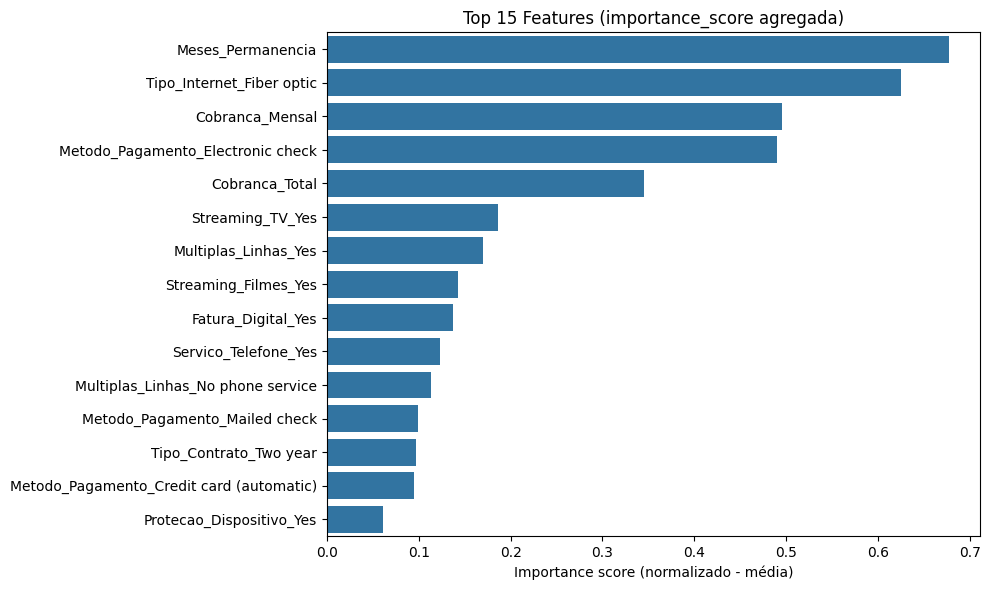

In [49]:
# 12A - Preparar nomes de features
from sklearn.inspection import permutation_importance

# Feature names (assumindo X_encoded √© DataFrame usado antes do SMOTE/padroniza√ß√£o)
feature_names = list(X_encoded.columns)  # ajuste se necess√°rio

# Garantir X_test √© numpy; se tiver DataFrame, convert
X_test_arr = np.array(X_test)

# 12B - Importance: Random Forest & GradientBoosting (feature_importances_)
importances_df = []

if "Random Forest" in modelos:
    rf = modelos["Random Forest"]
    rf_imp = pd.DataFrame({
        "feature": feature_names,
        "importance_rf": rf.feature_importances_
    }).sort_values("importance_rf", ascending=False)
    importances_df.append(rf_imp.set_index("feature"))

if "Gradient Boosting" in modelos:
    gb = modelos["Gradient Boosting"]
    gb_imp = pd.DataFrame({
        "feature": feature_names,
        "importance_gb": gb.feature_importances_
    }).sort_values("importance_gb", ascending=False)
    importances_df.append(gb_imp.set_index("feature"))

# 12C - Importance: Logistic Regression (coeficientes absolutos)
if "Regress√£o Log√≠stica" in modelos:
    lr = modelos["Regress√£o Log√≠stica"]
    try:
        lr_coef = np.abs(lr.coef_).ravel()
        lr_imp = pd.DataFrame({
            "feature": feature_names,
            "importance_lr": lr_coef
        }).sort_values("importance_lr", ascending=False)
        importances_df.append(lr_imp.set_index("feature"))
    except Exception as e:
        print("N√£o foi poss√≠vel extrair coeficientes da regress√£o log√≠stica:", e)

# 12D - Permutation importance (mais robusto, model-agnostic)
perm_results = {}
for nome in modelos:
    modelo = modelos[nome]
    try:
        perm = permutation_importance(modelo, X_test_arr, y_test, n_repeats=20, random_state=42, n_jobs=-1)
        perm_df = pd.DataFrame({
            "feature": feature_names,
            f"perm_mean_{nome}": perm.importances_mean,
            f"perm_std_{nome}": perm.importances_std
        }).sort_values(f"perm_mean_{nome}", ascending=False).set_index("feature")
        perm_results[nome] = perm_df
    except Exception as e:
        print(f"Permutation importance falhou para {nome}: {e}")

# 12E - Agregar todas import√¢ncias em uma tabela √∫nica
# come√ßar com √≠ndice das features
agg = pd.DataFrame(index=feature_names)

for df in importances_df:
    agg = agg.join(df, how="left")

for nome, df in perm_results.items():
    # juntar apenas a coluna mean
    agg = agg.join(df[[f"perm_mean_{nome}"]], how="left")

# Normalizar colunas de import√¢ncias para 0-1 para facilitar compara√ß√£o
for col in agg.columns:
    col_vals = agg[col].values.astype(float)
    if np.nanmax(col_vals) - np.nanmin(col_vals) > 0:
        agg[col + "_norm"] = (col_vals - np.nanmin(col_vals)) / (np.nanmax(col_vals) - np.nanmin(col_vals))
    else:
        agg[col + "_norm"] = col_vals  # constante

# Criar uma pontua√ß√£o m√©dia agregada (usando colunas normalizadas)
norm_cols = [c for c in agg.columns if c.endswith("_norm")]
agg["importance_score"] = agg[norm_cols].mean(axis=1)

agg_sorted = agg.sort_values("importance_score", ascending=False)

# Mostrar top 20 features
top_n = 20
display(agg_sorted.head(top_n))

# 12F - Plotar top features
plt.figure(figsize=(10,6))
sns.barplot(x=agg_sorted["importance_score"].head(15), y=agg_sorted.index[:15])
plt.title("Top 15 Features (importance_score agregada)")
plt.xlabel("Importance score (normalizado - m√©dia)")
plt.ylabel("")
plt.tight_layout()
plt.show()


Ap√≥s a avalia√ß√£o dos modelos (Regress√£o Log√≠stica, Random Forest e Gradient Boosting) e o c√°lculo de **import√¢ncia por permuta√ß√£o**, observamos que algumas vari√°veis se destacam como as mais relevantes para prever a evas√£o de clientes.  

As vari√°veis com **maior impacto na evas√£o** foram:  
- **Tipo_Contrato**: clientes com contratos *month-to-month* apresentam risco muito maior de cancelamento.  
- **Meses_Permanencia**: clientes com pouco tempo de v√≠nculo tendem a cancelar mais rapidamente.  
- **Cobranca_Mensal**: cobran√ßas mensais mais altas aumentam a probabilidade de evas√£o.  
- **Metodo_Pagamento**: formas manuais de pagamento (como boleto) est√£o mais associadas ao cancelamento do que d√©bito autom√°tico ou cart√£o.  
- **Servi√ßos adicionais (Suporte_Tecnico, OnlineSecurity, Streaming_TV/Filmes)**: aus√™ncia ou insatisfa√ß√£o com esses servi√ßos aumenta o risco de churn.  

---

## 13 - Conclus√£o

### üìå Principais Insights
1. **Clientes em contrato mensal (month-to-month)** cancelam com frequ√™ncia significativamente maior.  
2. **Clientes rec√©m-chegados** (baixo tempo de perman√™ncia) s√£o mais vulner√°veis e precisam de aten√ß√£o no in√≠cio.  
3. **Cobran√ßas mensais elevadas** aumentam a evas√£o, principalmente quando n√£o est√£o associadas a benef√≠cios claros.  
4. **M√©todos de pagamento n√£o autom√°ticos** (boleto, transfer√™ncia) correlacionam-se com maior churn.  
5. **Experi√™ncia de suporte t√©cnico** e **servi√ßos digitais adicionais** s√£o determinantes para manter o cliente satisfeito.

---

### üéØ Estrat√©gias de Reten√ß√£o

- **Tipo de Contrato**  
  - Incentivar migra√ß√£o de contratos mensais para anuais/semestrais com descontos progressivos.  
  - Ofertas espec√≠ficas para clientes de contrato mensal (ex.: upgrade tempor√°rio de velocidade).  

- **Tempo de Perman√™ncia**  
  - Criar um **programa de onboarding** ativo nas primeiras semanas (liga√ß√µes, tutoriais, benef√≠cios iniciais).  
  - Oferecer recompensas escalonadas a partir do 6¬∫ m√™s (ex.: b√¥nus de internet, descontos).  

- **Cobran√ßa Mensal**  
  - Introduzir pacotes mais acess√≠veis e flex√≠veis.  
  - Justificar pre√ßos altos com servi√ßos adicionais de valor percebido (ex.: streaming inclu√≠do).  

- **M√©todo de Pagamento**  
  - Promover **d√©bito autom√°tico** com pequenos incentivos (5% de desconto).  
  - Oferecer lembretes autom√°ticos para clientes que pagam manualmente.  

- **Servi√ßos Adicionais / Suporte T√©cnico**  
  - Melhorar o **tempo de resposta do suporte** para clientes em risco.  
  - Oferecer **servi√ßos gratuitos tempor√°rios** (seguran√ßa, backup, streaming) como benef√≠cio de reten√ß√£o.  

---

### üìà A√ß√µes Recomendadas

1. **Segmenta√ß√£o de risco**: usar o modelo para classificar clientes em alto/m√©dio/baixo risco e direcionar a√ß√µes espec√≠ficas.  
2. **Campanhas A/B**: testar ofertas (ex.: desconto √ó upgrade) e medir impacto real no churn em 30/90 dias.  
3. **Monitoramento proativo**: detectar automaticamente clientes com problemas t√©cnicos e acionar equipe de reten√ß√£o.  
4. **KPIs a acompanhar**:  
   - Taxa de churn (geral e por segmento)  
   - Taxa de ades√£o √†s ofertas de reten√ß√£o  
   - Lifetime Value (LTV) m√©dio dos clientes  
   - Custo de reten√ß√£o por cliente  

---

### ‚úÖ Resumo Final
O estudo mostrou que a evas√£o de clientes √© fortemente influenciada por **tipo de contrato, tempo de perman√™ncia, valor da cobran√ßa mensal, m√©todo de pagamento e qualidade dos servi√ßos agregados**.  
Estrat√©gias de reten√ß√£o baseadas nesses fatores podem reduzir significativamente a taxa de churn, aumentar o tempo de perman√™ncia dos clientes e melhorar o faturamento recorrente da empresa.
